<a href="https://colab.research.google.com/github/Bollapally-Manish-Kumar/AI-PROJECT-YHILLS/blob/main/Stock_Prices_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


        Date      Price
0 2020-01-02  75.087502
1 2020-01-03  74.357498
2 2020-01-06  74.949997
3 2020-01-07  74.597504
4 2020-01-08  75.797501
                                Date       Price
count                            756  756.000000
mean   2021-07-01 23:40:57.142856960  130.311812
min              2020-01-02 00:00:00   56.092499
25%              2020-09-30 18:00:00  115.739374
50%              2021-07-01 12:00:00  135.379997
75%              2022-03-31 06:00:00  150.704998
max              2022-12-30 00:00:00  182.009995
std                              NaN   30.566496


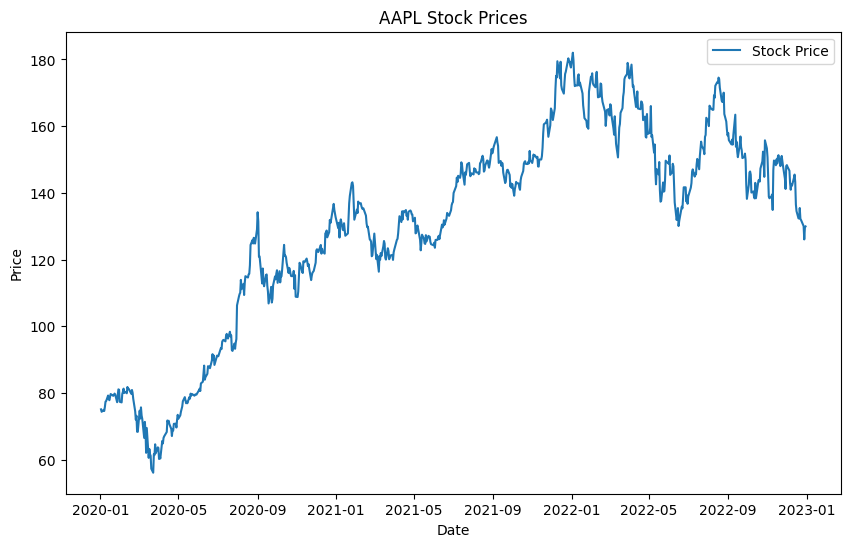

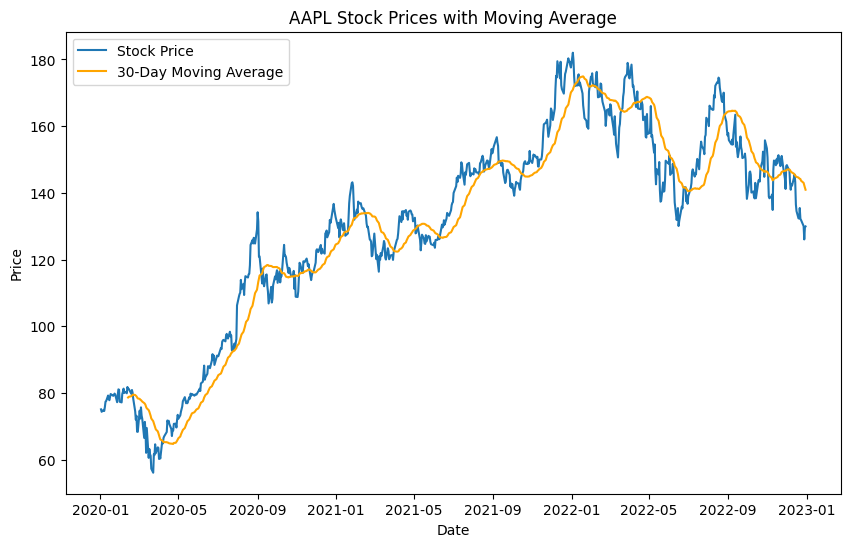

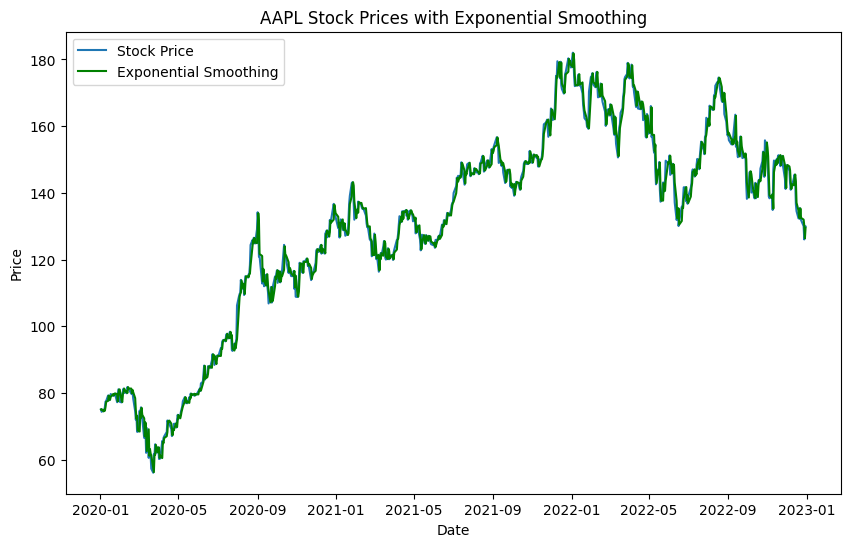

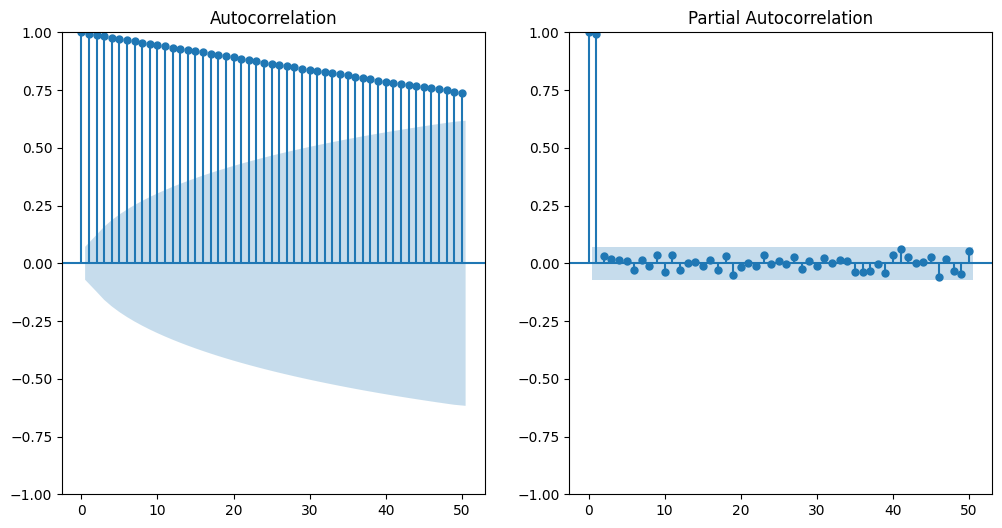

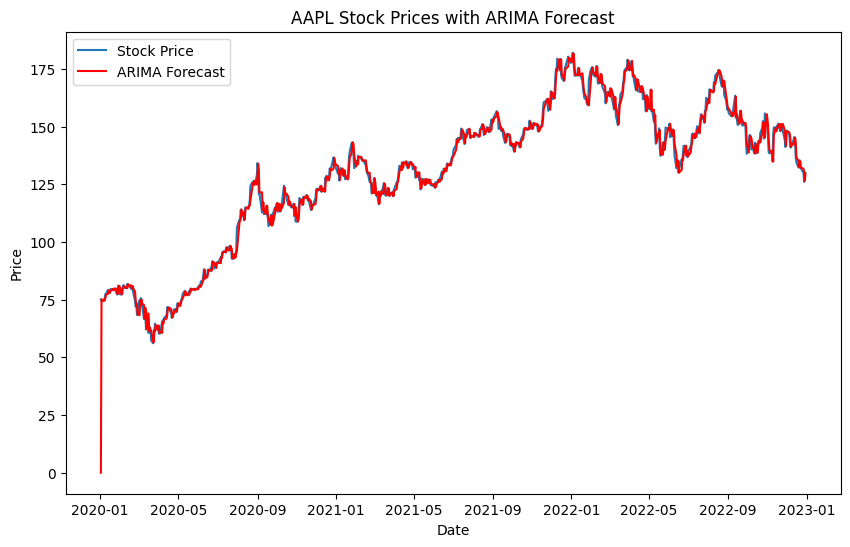

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Fetching historical stock price data
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data = data[['Close']]
data = data.rename(columns={'Close': 'Price'})
data = data.reset_index()

# Data Exploration
print(data.head())
print(data.describe())

# Plotting the stock price data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Prices')
plt.legend()
plt.show()

# Moving Average
window_size = 30
data['Moving_Avg'] = data['Price'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Stock Price')
plt.plot(data['Date'], data['Moving_Avg'], label='30-Day Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Prices with Moving Average')
plt.legend()
plt.show()

# Exponential Smoothing
model_exp = ExponentialSmoothing(data['Price'], trend='add', seasonal=None, seasonal_periods=None)
model_exp_fit = model_exp.fit()
data['Exp_Smooth'] = model_exp_fit.fittedvalues

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Stock Price')
plt.plot(data['Date'], data['Exp_Smooth'], label='Exponential Smoothing', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Prices with Exponential Smoothing')
plt.legend()
plt.show()

# ARIMA Model
# Plot ACF and PACF to determine parameters
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Price'].dropna(), ax=plt.gca(), lags=50)
plt.subplot(122)
plot_pacf(data['Price'].dropna(), ax=plt.gca(), lags=50)
plt.show()

# Fit ARIMA model
# Use statsmodels.tsa.arima.model.ARIMA instead of statsmodels.tsa.arima_model.ARIMA
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(data['Price'].dropna(), order=(5, 1, 0))  # Example order
model_arima_fit = model_arima.fit() # Remove disp argument
data['ARIMA_Forecast'] = model_arima_fit.fittedvalues

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Stock Price')
plt.plot(data['Date'], data['ARIMA_Forecast'], label='ARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Prices with ARIMA Forecast')
plt.legend()
plt.show()